# <b>1 <span style='color:#0386f7de'>|</span> Importing libraries</b>
- **For ML Models**: sklearn
- **For Data Manipulation**: numpy, pandas, sklearn
- **For Data Visualization**: matplotlib, seaborn, plotly

In [ ]:
# For ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Load the data

In [ ]:
df = pd.read_csv('data1.csv')

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'target'],
      dtype='object')

## Drop education and native-country columns

In [ ]:
df = df.drop(columns=['education', 'native-country'], axis=1)
df.info()
# df.columns
# df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  target          32561 non-null  object
dtypes: int64(6), object(7)
memory usage: 3.2+ MB


## Combine the occupation in 5 categories

In [ ]:
dict = {x: str(i) for i , x in enumerate(list(df['occupation'].unique()))}
# dict
encode_occupation = {' ?': '5',
 ' Adm-clerical': '1',
 ' Armed-Forces': '4',
 ' Craft-repair': '3',
 ' Exec-managerial': '1',
 ' Farming-fishing': '5',
 ' Handlers-cleaners': '5',
 ' Machine-op-inspct': '2',
 ' Other-service': '5',
 ' Priv-house-serv': '5',
 ' Prof-specialty': '1',
 ' Protective-serv': '4',
 ' Sales': '3',
 ' Tech-support': '2',
 ' Transport-moving': '3'}
df.replace({"occupation" : encode_occupation}, inplace=True)

In [ ]:
df['occupation'].value_counts()

1    11976
3     9346
5     7651
2     2930
4      658
Name: occupation, dtype: int64

## Column Statistics (of numerical data)

In [ ]:
df.describe()[1:][['age','fnlwgt','education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].T.style.background_gradient(cmap='Blues')

,mean,std,min,25%,50%,75%,max
age,38.581647,13.640433,17.000000,28.000000,37.000000,48.000000,90.000000
fnlwgt,189778.366512,105549.977697,12285.000000,117827.000000,178356.000000,237051.000000,1484705.000000
education-num,10.080679,2.572720,1.000000,9.000000,10.000000,12.000000,16.000000
capital-gain,1077.648844,7385.292085,0.000000,0.000000,0.000000,0.000000,99999.000000
capital-loss,87.303830,402.960219,0.000000,0.000000,0.000000,0.000000,4356.000000
hours-per-week,40.437456,12.347429,1.000000,40.000000,40.000000,45.000000,99.000000


## Column Statistics (of categorical data)

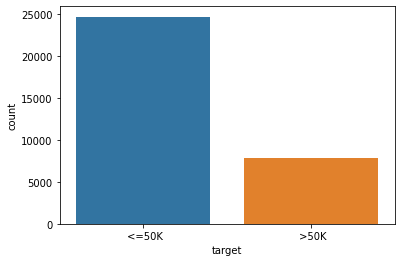

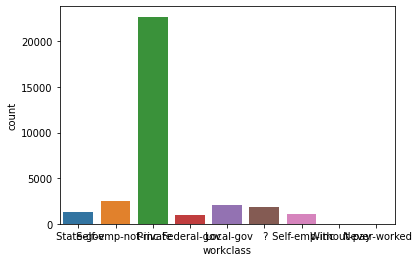

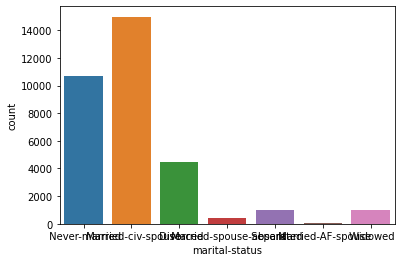

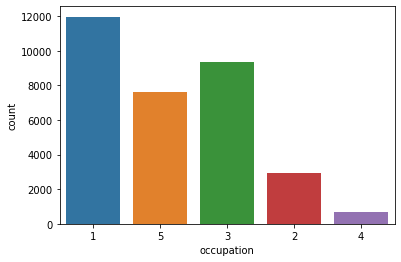

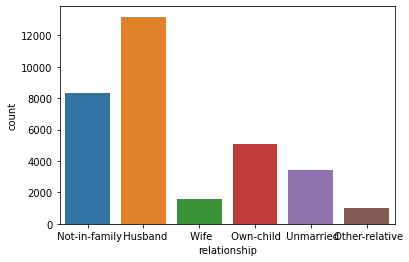

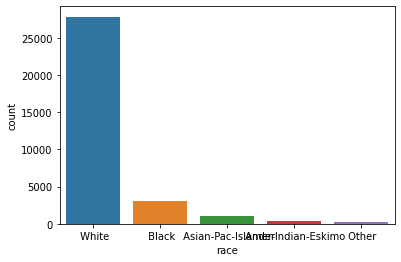

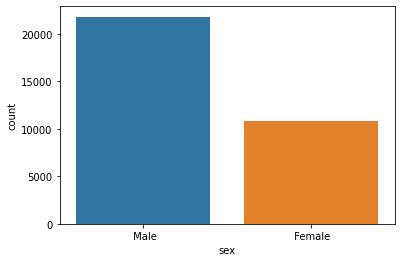

In [ ]:
import seaborn as sns
categ = ['target', 'workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex']
for nome in categ:
    ax = sns.countplot(x=nome, data=df)
    plt.show()

## ENCODING

In [ ]:
categB = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'target']

In [ ]:
le = LabelEncoder()
for col in categB:
    df[col] = le.fit_transform(df[col])


# df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,target
0,39,7,77516,13,4,0,1,4,1,2174,0,40,0
1,50,6,83311,13,2,0,0,4,1,0,0,13,0
2,38,4,215646,9,0,4,1,4,1,0,0,40,0
3,53,4,234721,7,2,4,0,2,1,0,0,40,0
4,28,4,338409,13,2,0,5,2,0,0,0,40,0


In [ ]:
df = pd.get_dummies(df,columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race'],
                    prefix=['class','status','occup', 'relation', 'race'])
# df.head()

## Split the data tp train and validation data

In [ ]:
train_df, val_df = train_test_split(df, test_size=0.3, stratify=df['target'], random_state=123)
print(train_df['target'].value_counts())
print(val_df['target'].value_counts())

0    17303
1     5489
Name: target, dtype: int64
0    7417
1    2352
Name: target, dtype: int64


## BALANCE CLASSES by resampling from the data

In [ ]:
class_0 =train_df[train_df['target']==0]
class_1 =train_df[train_df['target']==1]
aug = class_1.sample(len(class_0),replace=True)

In [ ]:
train_df = pd.concat([class_0,aug],axis=0)
train_df

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,target,class_0,class_1,...,relation_1,relation_2,relation_3,relation_4,relation_5,race_0,race_1,race_2,race_3,race_4
31955,46,267952,11,0,0,0,36,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4817,27,116531,13,0,0,0,40,0,0,0,...,1,0,0,0,0,0,0,0,0,1
11002,25,197036,6,1,0,0,40,0,0,0,...,0,0,1,0,0,0,0,0,0,1
20174,21,207103,9,1,0,0,40,0,0,0,...,0,0,1,0,0,0,0,0,0,1
29969,48,207817,9,0,0,0,32,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28320,36,504871,9,1,0,0,40,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1728,49,186078,14,0,0,0,50,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1207,38,79619,13,1,0,0,42,1,0,0,...,0,0,0,0,0,0,0,0,0,1
16422,50,158294,15,1,99999,0,80,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
print(train_df['target'].value_counts())
train_df.columns

0    17303
1    17303
Name: target, dtype: int64


Index(['age', 'fnlwgt', 'education-num', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'target', 'class_0', 'class_1', 'class_2', 'class_3',
       'class_4', 'class_5', 'class_6', 'class_7', 'class_8', 'status_0',
       'status_1', 'status_2', 'status_3', 'status_4', 'status_5', 'status_6',
       'occup_0', 'occup_1', 'occup_2', 'occup_3', 'occup_4', 'relation_0',
       'relation_1', 'relation_2', 'relation_3', 'relation_4', 'relation_5',
       'race_0', 'race_1', 'race_2', 'race_3', 'race_4'],
      dtype='object')

## Seperate the target

In [ ]:
# data train
y_train = train_df['target']
x_train = train_df.drop(labels=['target'],axis=1)
# x_train

In [ ]:
# data validation
y_val = val_df['target']
x_val = val_df.drop(labels=['target'],axis=1)
# x_val

# Decision Tree classifier

In [ ]:
# using decision tree classifier
dtree = DecisionTreeClassifier(min_samples_split=20,min_samples_leaf=8)
dtree.fit(x_train,y_train)


DecisionTreeClassifier(min_samples_leaf=8, min_samples_split=20)

### EVALUATION on test data

In [ ]:
y_pred = dtree.predict(x_val)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      7417
           1       0.58      0.72      0.64      2352

    accuracy                           0.81      9769
   macro avg       0.74      0.78      0.76      9769
weighted avg       0.83      0.81      0.81      9769



In [ ]:
# confusin matrix to compare the predicted data and real labels
confusion_matrix(y_val,y_pred)

array([[6210, 1207],
       [ 667, 1685]])

### CHANGE THE THREESHOLD

In [ ]:
y_prob = dtree.predict_proba(x_val)
y_prob

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [0.08333333, 0.91666667],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [ ]:
y_pred_t = y_prob[:,1]>0.7
confusion_matrix(y_val,y_pred_t)

array([[6654,  763],
       [ 900, 1452]])

### ROC

0.9099057059118645


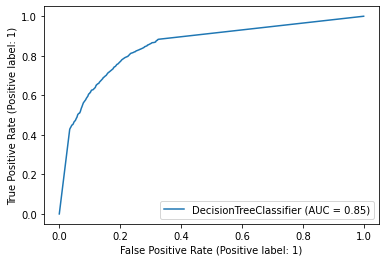

In [ ]:
# from sklearn import metrics
print(metrics.roc_auc_score(y_val, y_prob[:,1]))
RocCurveDisplay.from_estimator(dtree, x_val, y_val)

## RANDOM FORESTS

In [ ]:
clf = RandomForestClassifier(n_estimators=200,min_samples_split=15,
                             min_samples_leaf=8, max_features=4)
clf.fit(x_train,y_train)


RandomForestClassifier(max_features=4, min_samples_leaf=8, min_samples_split=15,
                       n_estimators=200)

### EVALUATION ON data test

In [ ]:
y_pred = clf.predict(x_val)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86      7417
           1       0.57      0.85      0.68      2352

    accuracy                           0.81      9769
   macro avg       0.76      0.82      0.77      9769
weighted avg       0.85      0.81      0.82      9769



### CONFUSION MATRIX

In [ ]:
confusion_matrix(y_val,y_pred)

array([[5896, 1521],
       [ 349, 2003]])

### Evaluation on test data (probability)

In [ ]:
y_prob = clf.predict_proba(x_val)
y_prob

array([[0.50889865, 0.49110135],
       [0.92894119, 0.07105881],
       [0.91827249, 0.08172751],
       ...,
       [0.12415709, 0.87584291],
       [0.90598393, 0.09401607],
       [0.78712034, 0.21287966]])

In [ ]:
y_pred_t = y_prob[:,1]>0.7
confusion_matrix(y_val,y_pred_t)

array([[6923,  494],
       [ 890, 1462]])

### EVALUATION ON TRAIN

In [ ]:
yy_pred = clf.predict(x_train)
print(classification_report(y_train,yy_pred))
confusion_matrix(y_train,yy_pred)

              precision    recall  f1-score   support

           0       0.90      0.81      0.85     17303
           1       0.83      0.91      0.87     17303

    accuracy                           0.86     34606
   macro avg       0.86      0.86      0.86     34606
weighted avg       0.86      0.86      0.86     34606



array([[13996,  3307],
       [ 1519, 15784]])

### ROC

0.9099057059118645


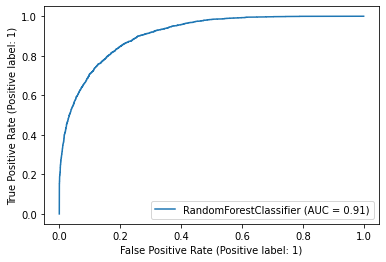

In [ ]:
from sklearn import metrics
print(metrics.roc_auc_score(y_val, y_prob[:,1]))
RocCurveDisplay.from_estimator(clf, x_val, y_val)

## PRECISION - RECALL

In [ ]:
predictions = clf.predict(x_val)

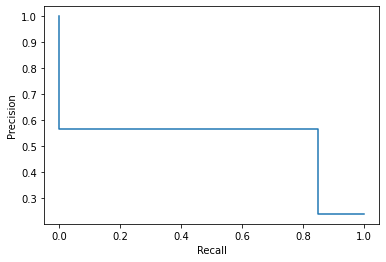

In [ ]:
precision, recall, _ = precision_recall_curve(y_val,predictions)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

# Gradient Boosting

class sklearn.ensemble.GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=220, subsample=0.5, learning_rate=0.05)
gbc.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=220, subsample=0.5)

### Evaluation on validation data

In [ ]:
y_pred = gbc.predict(x_val)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      7417
           1       0.59      0.84      0.69      2352

    accuracy                           0.82      9769
   macro avg       0.77      0.83      0.78      9769
weighted avg       0.86      0.82      0.83      9769



### confusion matrix

In [ ]:
confusion_matrix(y_val,y_pred)

array([[6041, 1376],
       [ 375, 1977]])

### probability evaluation

In [ ]:
predictions = gbc.predict_proba(x_val)
# np.savetxt("sample.txt", predictions, delimiter =",")
predictions


array([[0.55092066, 0.44907934],
       [0.95570334, 0.04429666],
       [0.92670514, 0.07329486],
       ...,
       [0.10904332, 0.89095668],
       [0.92239057, 0.07760943],
       [0.8712866 , 0.1287134 ]])

### ROC

0.9099057059118645


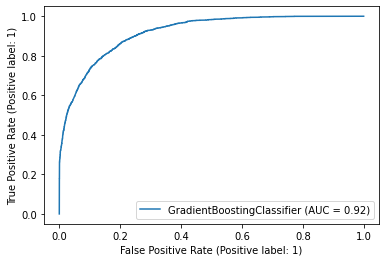

In [ ]:
# from sklearn import metrics
print(metrics.roc_auc_score(y_val, y_prob[:,1]))
RocCurveDisplay.from_estimator(gbc, x_val, y_val)